In [1]:
import pandas as pd

# Separera ";" så att datan kan läsas in korrekt
df = pd.read_csv("cardio_train.csv", sep=";")

df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [2]:
# Räkna hur många som är positiva/negativa i hjärt-kärlsjukdom i kolumnen "cardio"
sjuk = df["cardio"].value_counts().sort_index()
sjuk

cardio
0    35021
1    34979
Name: count, dtype: int64

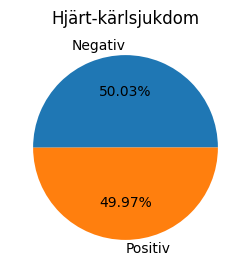

In [3]:
import matplotlib.pyplot as plt

# Skapa titlar till diagrammet 
labels = ["Negativ", "Positiv"]

# Skapa tårtdiagram
plt.figure(figsize=(3, 3))
plt.pie(sjuk, labels=labels, autopct='%1.2f%%')
plt.title("Hjärt-kärlsjukdom")
plt.show()

In [4]:
cho = df["cholesterol"].value_counts().sort_index()
cho

cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64

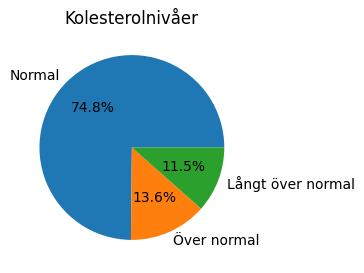

In [5]:
labels = ["Normal", "Över normal", "Långt över normal"]

plt.figure(figsize=(3, 3))
plt.pie(cho, labels=labels, autopct='%1.1f%%')
plt.title("Kolesterolnivåer")
plt.show()

In [6]:
# Konvertera dagar till år
age = df["age"] // 365
age

0        50
1        55
2        51
3        48
4        47
         ..
69995    52
69996    61
69997    52
69998    61
69999    56
Name: age, Length: 70000, dtype: int64

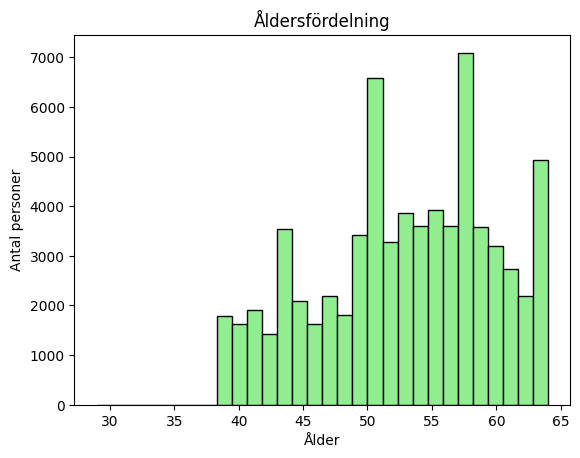

In [7]:
# Skapa histogram
plt.hist(age, bins=30, color='lightgreen', edgecolor='black')
plt.title("Åldersfördelning")
plt.xlabel("Ålder")
plt.ylabel("Antal personer")
plt.show()

In [8]:
smokers = df["smoke"].value_counts().sort_index()
smokers

smoke
0    63831
1     6169
Name: count, dtype: int64

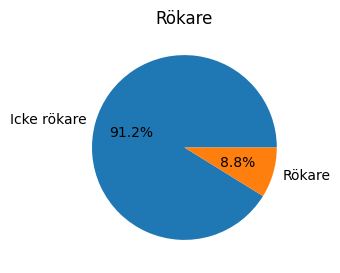

In [9]:
labels = ["Icke rökare", "Rökare"]

plt.figure(figsize=(3, 3))
plt.pie(smokers, labels=labels, autopct='%1.1f%%')
plt.title("Rökare")
plt.show()

In [10]:
vikt = df["weight"].value_counts().sort_index()
vikt

weight
10.0     1
11.0     1
21.0     1
22.0     1
23.0     1
        ..
178.0    3
180.0    4
181.0    1
183.0    1
200.0    2
Name: count, Length: 287, dtype: int64

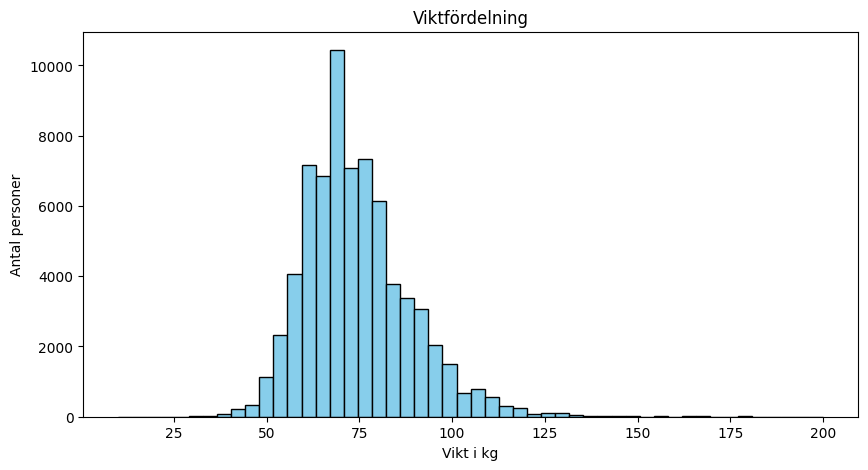

In [11]:
plt.figure(figsize=(10, 5))
plt.hist(vikt.index.repeat(vikt.values), bins=50, color="skyblue", edgecolor="black")
plt.title("Viktfördelning")
plt.xlabel("Vikt i kg")
plt.ylabel("Antal personer")
plt.show()


In [12]:
längd = df["height"].value_counts().sort_index()
längd

height
55      1
57      1
59      1
60      1
64      1
       ..
197     4
198    14
200     1
207     1
250     1
Name: count, Length: 109, dtype: int64

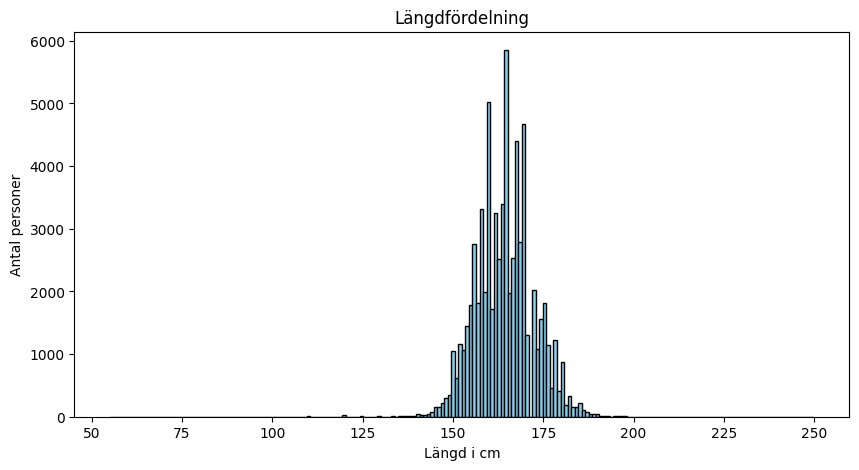

In [13]:
plt.figure(figsize=(10, 5))
plt.hist(längd.index.repeat(längd.values), bins=200, color="skyblue", edgecolor="black")
plt.title("Längdfördelning")
plt.xlabel("Längd i cm")
plt.ylabel("Antal personer")
plt.show()

In [14]:
sjuk = df["cardio"].value_counts().sort_index()
sjuk

cardio
0    35021
1    34979
Name: count, dtype: int64

In [15]:
# Visa endast positiva i hjärt-kärlsjukdom
positiva = (df["cardio"]== 0).sum()
positiva

np.int64(35021)

In [16]:
# Visa hur många kvinnor det finns
women = (df["gender"]== 1).sum()
women

np.int64(45530)

In [17]:
# Visa hur många män det finns
men = (df["gender"]== 2).sum()
men

np.int64(24470)

In [18]:
# Visa hur många kvinnor/män som är positiva i hjär-kärlsjukdom
sick_men = ((df["gender"] == 2) & (df["cardio"] == 1)).sum()
sick_women = ((df["gender"] == 1) & (df["cardio"] == 1)).sum()

print(f"Antal män med hjärt-kärlsjukdom: {sick_men}")
print(f"Antal kvinnor med hjärt-kärlsjukdom: {sick_women}")

Antal män med hjärt-kärlsjukdom: 12363
Antal kvinnor med hjärt-kärlsjukdom: 22616


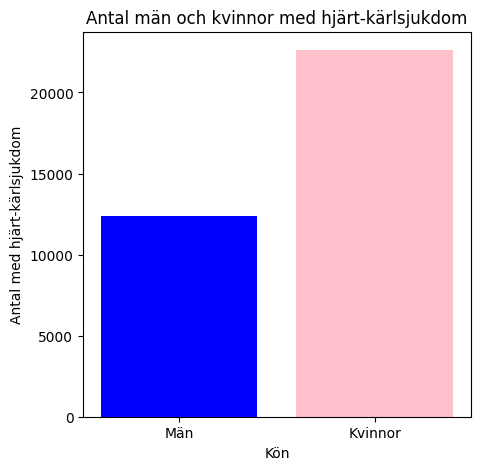

In [19]:
values = [sick_men, sick_women]
labels = ["Män", "Kvinnor"]

# Skapa stapeldiagram
plt.figure(figsize=(5, 5))
plt.bar(labels, values, color=["blue", "pink"])
plt.xlabel("Kön")
plt.ylabel("Antal med hjärt-kärlsjukdom")
plt.title("Antal män och kvinnor med hjärt-kärlsjukdom")
plt.show()

In [20]:
# Beräknar BMI och lägger till de uträknade värdena i en ny kolumn
df["BMI"] = df["weight"] / (df["height"] / 100) ** 2

In [21]:
# Gränser enligt 1177
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    if bmi >= 18.5 and bmi < 25:
        return "Normal range"
    elif bmi >= 25 and bmi < 30:
        return "Overweight"
    elif bmi >= 30 and bmi < 35:
        return "Obese (class I)"
    elif bmi >= 35 and bmi < 40:
        return "Obese (class II)"
    else:
        return "Obese (class III)"

# Skapa en kolumn, beroende på värdet i kolumnen "BMI" beräkna vilken BMI-kategori den tillhör
df['BMI_category'] = df.apply(lambda row: bmi_category(row['BMI']), axis=1)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal range
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obese (class I)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal range
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,Overweight
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,Obese (class III)
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,Obese (class I)
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,Overweight


In [22]:
# Korrigera blodtryckvärden
def ap_hi(ap_hi):
    if ap_hi < 0: 
        return ap_hi * (-1)
    elif ap_hi < 50:
        return ap_hi * 10
    elif ap_hi > 340 and ap_hi < 9999:
        return ap_hi / 10
    elif ap_hi > 9999:
        return ap_hi / 100
    else:
        return ap_hi
    
# Med hjälp av en klasskamrat   
df['ap_hi'] = df.apply(lambda row: ap_hi(row['ap_hi']), axis=1) 

def ap_lo(ap_lo):
    if ap_lo < 0: 
        return ap_lo * (-1)
    if ap_lo > 150 and ap_lo < 9999:
        return ap_lo / 10
    elif ap_lo > 9999:
        return ap_lo / 100
    else:
        return ap_lo
    
df['ap_lo'] = df.apply(lambda row: ap_lo(row['ap_lo']), axis=1)

# Filtrerar datan och behåll endast rader där ap_lo är mindre än ap_hi.
df = df.loc[df["ap_lo"] < df["ap_hi"]]

# Säkerställ att ap_hi inte är mer än 150 högre än ap_lo.
df = df.loc[df["ap_lo"] + 150 >= df["ap_hi"]]

In [23]:
# Gränser enligt https://www.healthline.com/health/high-blood-pressure-hypertension#readings
# Sätt gränser för blodtryck
def bp_category(ap_hi):
    if ap_hi < 85:
        return "Low pressure"
    elif ap_hi >= 85 and ap_hi < 120:
        return "Healthy"
    elif ap_hi >= 120 and ap_hi < 130:
        return "Elevated"
    elif ap_hi >= 130 and ap_hi < 140:
        return "Hypertension Stage 1"
    elif ap_hi >= 140 and ap_hi < 180:
        return "Hypertension Stage 2"
    elif ap_hi >= 180:
        return "Hypertensive Crisis"

df['BP_category'] = df.apply(lambda row: bp_category(row['ap_hi']), axis=1)


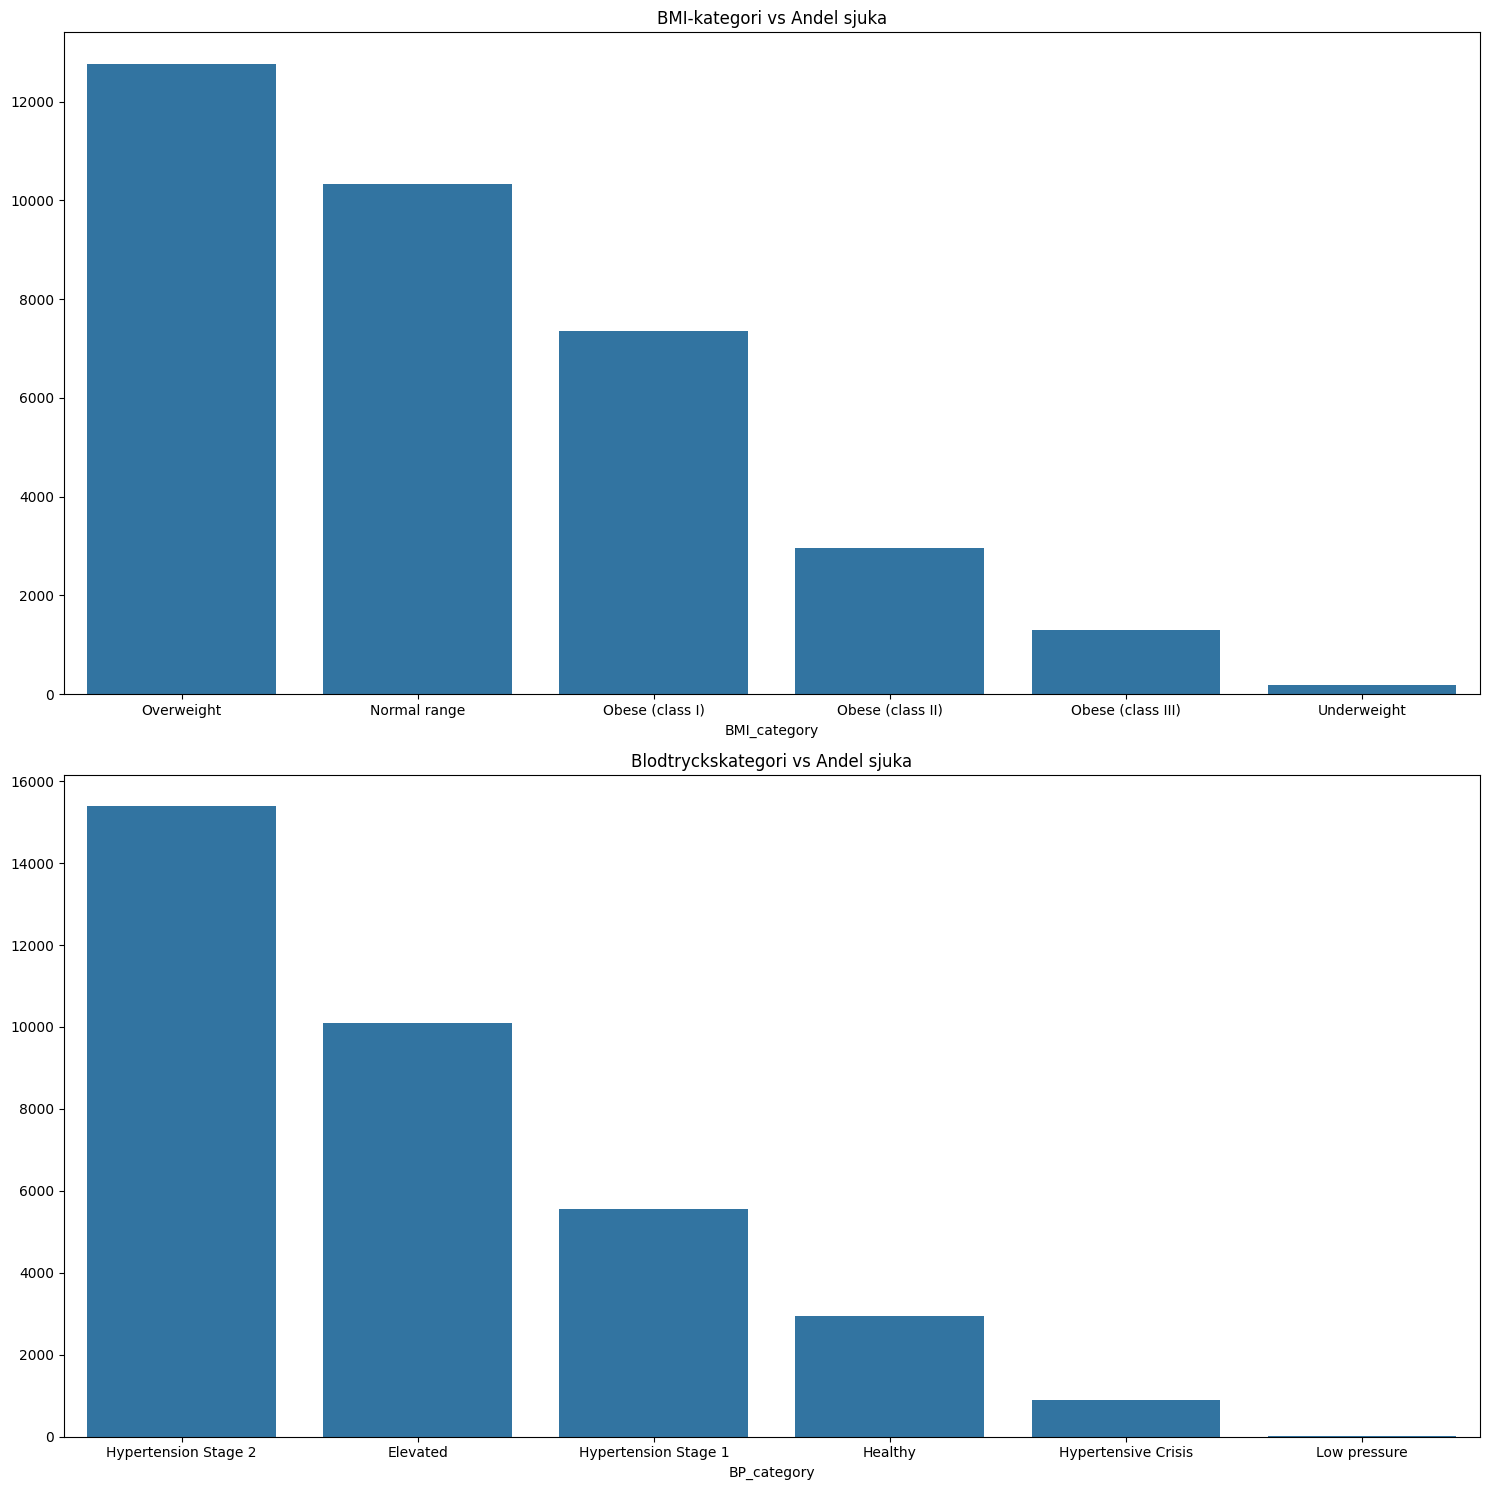

In [24]:
import seaborn as sns
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))
 
# Vilka kategoreier som ska visualiseras och vilka titlar de ska ha
categories = ["BMI_category", "BP_category"]
titles = ["BMI-kategori vs Andel sjuka", "Blodtryckskategori vs Andel sjuka"]
 
# Med hjälp av chatgpt
# Loopa igenom varje kategori och skapa stapeldiagram
for i, (category, title) in enumerate(zip(categories, titles)):
    data = df[df["cardio"] == 1][category].value_counts()
    sns.barplot(x=data.index, y=data.values, ax=axes[i])
    axes[i].set_title(title)
 
plt.tight_layout()
plt.show()

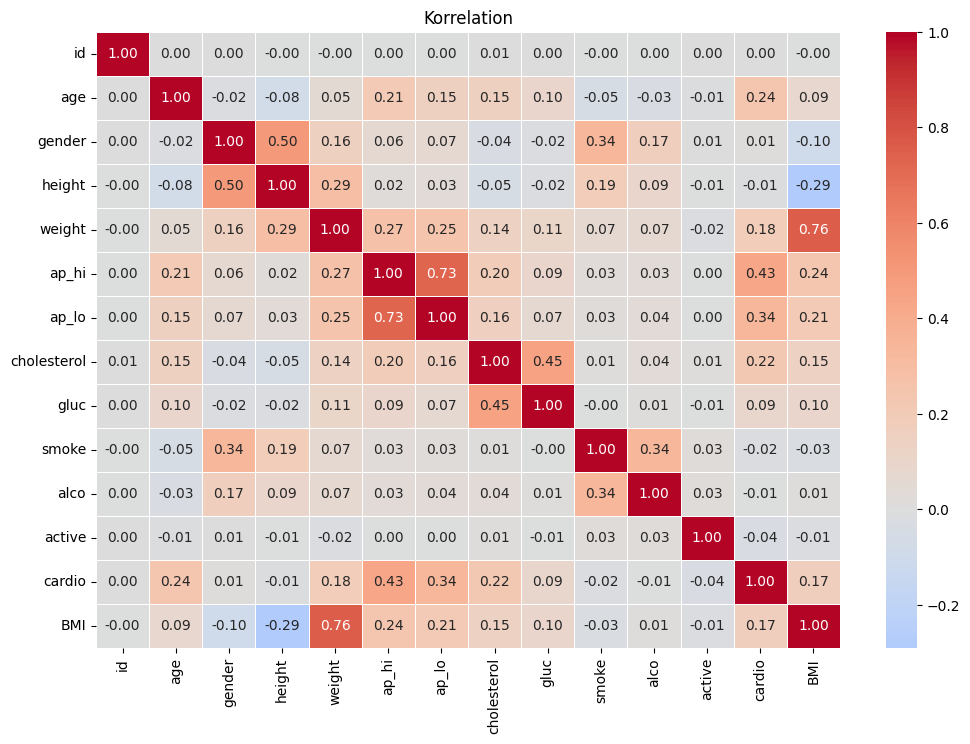

In [25]:
# Med hjälp av chatgpt
# Välj numeriska kolumner
data = df.select_dtypes(include="number")

# Beräkna korrelationen
corr_matrix = data.corr()

# Skapa en heatmap
plt.figure(figsize=(12, 8))  
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f", linewidths=0.5)
plt.title("Korrelation")
plt.show()

# Ex: Vikt och BMI är starkt positivt korrelerade eftersom högre kroppsvikt ofta leder till ett högt BMI.

In [26]:
# Skapa en kopia av df
copy1 = df.copy()

# Ta bort vissa kolumner
copy1 = copy1.drop(columns=["ap_hi", "ap_lo", "height", "weight", "BMI"])

# Kolumner att göra one-hot encoding på
columns_to_encode = ["BMI_category", "BP_category", "gender"]  

# Gör one-hot encoding
copy1 = pd.get_dummies(copy1, columns=columns_to_encode)

In [27]:
copy2 = df.copy()
copy2 = copy2.drop(columns=["BMI_category", "BP_category", "height", "weight"])
columns_to_encode = ["gender"]
copy2 = pd.get_dummies(copy2, columns=columns_to_encode)

In [28]:
# Med hjälp av en klasskamrat
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier

X = copy1.drop("cardio", axis=1)
y = copy1["cardio"]
X2 = copy2.drop("cardio", axis=1)
y2 = copy2["cardio"]

# Dela upp datan
X_train, X_temp, y_train,y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

X_train1, X_temp1, y_train1, y_temp1 = train_test_split(X2, y2, test_size=0.3, random_state=42)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_temp1, y_temp1, test_size=0.4, random_state=42)

#X_val, X_temp, y_val, y_temp = train_test_split(X2, y2, test_size=0.5, random_state=42)

In [29]:
# Hjälp av en klasskamrat
log_reg_pipeline = Pipeline([("standard", StandardScaler()),
                        ("minmax", MinMaxScaler()),
                        ("log_reg", LogisticRegression())])

param_grid_log_reg = {
    'log_reg__solver': ['lbfgs', 'liblinear'],
    'log_reg__max_iter': [100, 200, 300],
    'log_reg__C': [0.1, 1, 10]
}

grid_search_log_reg = GridSearchCV(log_reg_pipeline, param_grid_log_reg, scoring='accuracy', cv=5)
grid_search_log_reg.fit(X_train, y_train)
y_model = grid_search_log_reg.best_estimator_
y_pred = y_model.predict(X_val)

print("Best parameters:", grid_search_log_reg.best_params_)
print("Cross-validation Accuracy:", grid_search_log_reg.best_score_)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

# Cross-validation Accuracy = 0.7294
# X_val = 0.7259
# X_val1 = 0.7240

Best parameters: {'log_reg__C': 0.1, 'log_reg__max_iter': 100, 'log_reg__solver': 'liblinear'}
Cross-validation Accuracy: 0.7294661636141037
Validation Accuracy: 0.7259064885496184


In [36]:
knn_pipeline = Pipeline([("standard", StandardScaler()),
                        ("minmax", MinMaxScaler()),
                        ("knn", KNeighborsClassifier())])

param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2]  # 1 = manhattan, 2 = euclidean distance
}

grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, scoring='accuracy', cv=5)
grid_search_knn.fit(X_train, y_train)
y_model = grid_search_log_reg.best_estimator_
y_pred = y_model.predict(X_val)

print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Cross-validation Accuracy:", grid_search_knn.best_score_)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

# Accuracy = 0.7051
# X_val = 0.7259
# X_val1 = 0.7240

Best parameters for KNN: {'knn__n_neighbors': 7, 'knn__p': 1, 'knn__weights': 'uniform'}
Cross-validation Accuracy: 0.7051546116128032
Validation Accuracy: 0.7259064885496184


In [31]:
gradient_pipeline = Pipeline([("standard", StandardScaler()),
                        ("minmax", MinMaxScaler()),
                        ("gradient", GradientBoostingClassifier())])

param_grid_gradient = {
    'gradient__n_estimators': [50, 100, 150],
    'gradient__learning_rate': [0.05, 0.1, 0.2],
    'gradient__max_depth': [3, 5, 7]
}

grid_search_gradient = GridSearchCV(gradient_pipeline, param_grid_gradient, scoring='accuracy', cv=5)
grid_search_gradient.fit(X_train, y_train)
y_model = grid_search_log_reg.best_estimator_
y_pred = y_model.predict(X_val)

print("Best parameters:", grid_search_gradient.best_params_, grid_search_gradient.best_score_)
print("Cross-validation Acuracy:", grid_search_gradient.best_score_)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

# Accuracy = 0.7358
# X_val = 0.7259
# X_val1 = 0.7240

Best parameters: {'gradient__learning_rate': 0.1, 'gradient__max_depth': 3, 'gradient__n_estimators': 150} 0.7358455867405399
Cross-validation Acuracy: 0.7358455867405399
Validation Accuracy: 0.7259064885496184


In [32]:
rf_pipeline = Pipeline([("standard", StandardScaler()),
                        ("minmax", MinMaxScaler()),
                        ("random", RandomForestClassifier())])

param_grid_rf = {
    'random__n_estimators': [50, 100, 200],
    'random__max_depth': [10, 20, None],
    'random__min_samples_split': [2, 5],
    'random__min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, scoring='accuracy', cv=5)
grid_search_rf.fit(X_train, y_train)
y_model = grid_search_log_reg.best_estimator_
y_pred = y_model.predict(X_val)

print("Best parameters:", grid_search_rf.best_params_)
print("Cross-validation Accuracy:", grid_search_rf.best_score_)
print("Validation Accuracy:", accuracy_score(y_val, y_pred))

# Accuracy = 0.7343
# X_val = 0.7259
# X_val1 = 0.7240

Best parameters: {'random__max_depth': 10, 'random__min_samples_leaf': 2, 'random__min_samples_split': 5, 'random__n_estimators': 50}
Cross-validation Accuracy: 0.7348232820962686
Validation Accuracy: 0.7259064885496184


In [33]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Skapa VotingClassifier med bästa parametrar för varje modell
voting_clf = VotingClassifier(
    estimators=[
        ('log_reg', grid_search_log_reg.best_estimator_),
        ('knn', grid_search_knn.best_estimator_),
        ('rf', grid_search_rf.best_estimator_),
        ('gradient', grid_search_gradient.best_estimator_)
    ],
    voting='hard'
)

# Träna VotingClassifier på hela träningsdatan (utan testdatan)
voting_clf.fit(X_train, y_train)

# Gör förutsägelser på valideringsdata
y_pred = voting_clf.predict(X_val)

# Beräkna och skriv ut accuracy på valideringsdatan
accuracy = accuracy_score(y_val, y_pred)
print("VotingClassifier Accuracy on Validation Data:", accuracy)


VotingClassifier Accuracy on Validation Data: 0.7293256997455471


In [34]:
# log_reg modell vald
best_log_reg_model = grid_search_log_reg.best_estimator_

# Träna modellen på hela träningsdatan (utan testdatan)
best_log_reg_model.fit(X_train, y_train)

# Gör förutsägelser på valideringsdatan
y_pred = best_log_reg_model.predict(X_val)

# Beräkna och skriv ut noggrannheten (accuracy) på valideringsdatan
accuracy = accuracy_score(y_val, y_pred)
print("Logistic Regression Accuracy on Validation Data:", accuracy)


Logistic Regression Accuracy on Validation Data: 0.7259064885496184


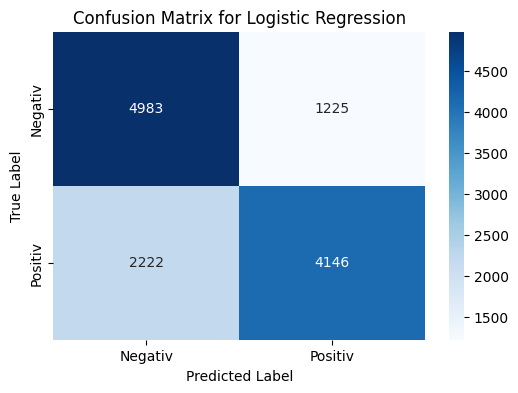

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.69      0.80      0.74      6208
           1       0.77      0.65      0.71      6368

    accuracy                           0.73     12576
   macro avg       0.73      0.73      0.72     12576
weighted avg       0.73      0.73      0.72     12576



In [35]:
from sklearn.metrics import confusion_matrix, classification_report
# Gör förutsägelser med den bästa modellen på valideringsdatan
y_pred = best_log_reg_model.predict(X_val)

# 1. Confusion Matrix
cm = confusion_matrix(y_val, y_pred)

# Visualisera confusion matrix som en värmekarta
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativ', 'Positiv'], yticklabels=['Negativ', 'Positiv'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# 2. Classification Report
report = classification_report(y_val, y_pred)
print("Classification Report for Logistic Regression:")
print(report)
